Modeling queue example that create customers
Customers arrive every 2 minutes and it takes 2 minutes to get served 
At what time 10 customers are waiting to get served?


In [1]:
import simpm.des as des
import simpm.dist as dist

ten_customers=[]
for i in range(10):
    env=des.Environment()

    cs=des.Resource(env,"customer",0)
    creator=des.Entity(env,"cutomer_creator")
    t=des.Entity(env,"teller")

    def create_customer_process(creator,customers):
        for i in range(10000):
            yield creator.do("wait",dist.expon(2))
            yield creator.add(customers,1)
            # if customers.level()==10:
            #     ten_customers.append(env.now)
            #     break
                

    def teller_process(teller,customers):
        while True:
            yield teller.get(customers,1)
            yield teller.do("server",dist.norm(2,1))
    p=env.process(create_customer_process(creator,cs))
    env.process(teller_process(t,cs))
    env.run()

In [43]:
print(env.now,cs.level())

10000 0


In [72]:
import random as r
env=des.Environment()

cs=des.Resource(env,"customer",0)
creator=des.Entity(env,"cutomer_creator")
t=des.Entity(env,"teller")

def create_customer_process(creator,customers):
        for i in range(10000):
            yield creator.do("wait",dist.expon(2))
            yield creator.add(customers,1)
            
                

def teller_process(teller,customers):
        while True:
            yield teller.get(customers,1)
            yield teller.do("server",dist.norm(2,1))
            if r.random()<.1:
                #yield teller.do("serve again",dist.norm(2,1))
                yield teller.add(customers,1)
p=env.process(create_customer_process(creator,cs))
env.process(teller_process(t,cs))
env.run()

In [73]:
env.now

26.400112881427912

In [26]:
import simpm.des as des
env=des.Environment()

cs=des.Resource(env,"customer",0)
creator=des.Entity(env,"cutomer_creator")
t=des.Entity(env,"teller")
def create_customer_process(creator,customers):
    for i in range(10000):
        yield creator.do("wait",2)
        yield creator.add(customers,1)
        if customers.level()==10:
            print(env.now)
            break
            

def teller_process(teller,customers):
    while True:
        yield teller.get(customers,1)
        yield teller.do("server",4)

p=env.process(create_customer_process(creator,cs))
env.process(teller_process(t,cs))
env.run(until=p)

40


In [27]:
print(env.now,cs.level())

40 10


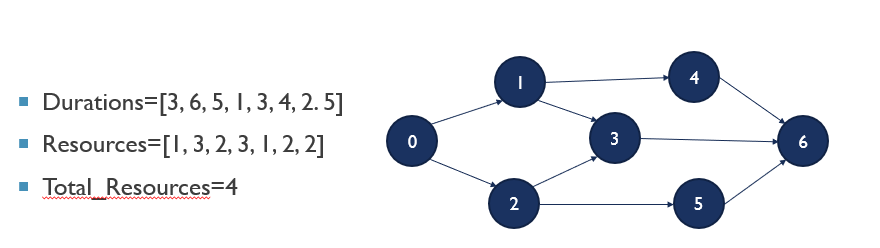

In [75]:
env.create_entities?

Signature: env.create_entities(name, total_number, print_actions=False, log=True)
Docstring:
Create entities by making instances of class entity and adding them to the environemnt.
All the entities are created at the current simulation time: env.now

Parameters
----------
name : string
    Name of the entities, the name of each entity would be name_0, name_1, ...
print_actions : bool
    If equal to True, the actions of the entities will be printed in console
log: bool
    If equals True, various statistics will be collected for the entities

Returns
-------
list of entitiy
    A list containing all the created entities
File:      c:\users\naima\appdata\local\programs\python\python311\lib\site-packages\simpm\des.py
Type:      method

In [88]:


env=des.Environment()
res=des.PriorityResource(env,"r1",4)
e=env.create_entities("activity",6,True)

def a0(e,r0):
    yield e.get(r0,1)
    yield e.do("activity0",3)
    yield e.put(r0,1)

def a1(e,r):
    yield p0
    yield e.get(r,3,2)
    yield e.do("activity1",6)
    yield e.put(r,3)

def a2(e,r):
    yield p0
    yield e.get(r,2)
    yield e.do("activity2",5)
    yield e.put(r,2)


def a3(e,r):
    yield p1 & p2
    yield e.get(r,3)
    yield e.do("activity3",1)
    yield e.put(r,3)

p0=env.process(a0(e[0],res))
p1=env.process(a1(e[1],res))
p2=env.process(a2(e[2],res))
p3=env.process(a3(e[3],res))
#p4=env.process(a4(e[4],r))
#p5=env.process(a5(e[5],r))
#p6=env.process(a6(e[6],r))

env.run()

activity(1) is created, sim_time: 0
activity(2) is created, sim_time: 0
activity(3) is created, sim_time: 0
activity(4) is created, sim_time: 0
activity(5) is created, sim_time: 0
activity(6) is created, sim_time: 0
activity(1) requested 1 r1(s)(1), sim_time: 0
activity(1) got 1 r1(s)(1), sim_time: 0
activity(1) started activity0 , sim_time: 0
activity(1) finished activity0 , sim_time: 3
activity(1) put back 1 r1(s)(1), sim_time: 3
activity(2) requested 3 r1(s)(1), sim_time: 3
activity(3) requested 2 r1(s)(1), sim_time: 3
activity(3) got 2 r1(s)(1), sim_time: 3
activity(3) started activity2 , sim_time: 3
activity(3) finished activity2 , sim_time: 8
activity(3) put back 2 r1(s)(1), sim_time: 8
activity(2) got 3 r1(s)(1), sim_time: 8
activity(2) started activity1 , sim_time: 8
activity(2) finished activity1 , sim_time: 14
activity(2) put back 3 r1(s)(1), sim_time: 14
activity(4) requested 3 r1(s)(1), sim_time: 14
activity(4) got 3 r1(s)(1), sim_time: 14
activity(4) started activity3 , si

In [56]:
import simpm.des as des
import simpm.dist as dist
import random
env=des.Environment()
small_trucks_dumped=0
large_trucks_dumped=0
dirt=des.Resource(env,"dirt",init=10000,capacity=100000)
loader1=des.PriorityResource(env,"loader1",init=1,print_actions=True)
loader2=des.PriorityResource(env,"loader2",init=1,print_actions=True)
dump_station=des.Resource(env,"dump_station",init=1)
repair_man1=des.Entity(env,"rman")
repair_man2=des.Entity(env,"rman")
repair_man1["MTBF"]=500
repair_man2["MTBF"]=500
repair_man1["MTTR"]=20
repair_man2["MTTR"]=20

loaded_amount1=des.Resource(env,"loaded_amount1",init=0)
loaded_amount2=des.Resource(env,"loaded_amount2",init=0)
  
def test_truck_numbers(n1,n2):
    
    ts=[]
    global small_trucks_dumped,large_trucks_dumped
    small_trucks_dumped=0;large_trucks_dumped=0
    for i in range(n1):
        lt=des.Entity(env,"truck")
        lt["capacity"]=20
        lt["loading time"]=5
        lt["hauling time"]=35
        lt["dumping time"]=2
        lt["returning time"]=20
        ts.append(lt)
    for i in range(n2):
        st=des.Entity(env,"truck")
        st["capacity"]=15
        st["loading time"]=3
        st["hauling time"]=25
        st["dumping time"]=1.5
        st["returning time"]=13
        ts.append(st)

    def truck_process(truck_e,loader,dump_station,dirt):
        global large_trucks_dumped,small_trucks_dumped
        while True:
            if dirt.level()==0:
                break
            if dirt.level()<truck_e["capacity"]:
                yield truck_e.get(dirt,dirt.level())
            else:
                yield truck_e.get(dirt,truck_e["capacity"])
            #print("I am moving dirt")
            e1=truck_e.get(loader1,1,10)
            e2=truck_e.get(loader2,1,10)
            yield e1|e2
            if truck_e.is_pending(loader1):
                 truck_e.cancel(loader1,1)
                 loader=loader2
            elif truck_e.is_pending(loader2):
                 truck_e.cancel(loader2,1)
                 loader=loader1
            else:
                if random.random()<.5:
                    truck_e.put(loader1,1)
                    loader=loader2
                else:
                    truck_e.put(loader2,1)
                    loader=loader1
                    
            yield truck_e.do("loading",truck_e["loading time"])
            if loader==loader1:
                yield truck_e.add(loaded_amount1,truck_e["capacity"])
            else:
                yield truck_e.add(loaded_amount2,truck_e["capacity"])
            yield truck_e.put(loader,1)
            yield truck_e.do("hauling",truck_e["hauling time"])
            yield truck_e.get(dump_station,1)
            yield truck_e.do("dumping",truck_e["dumping time"])
            if truck_e["capacity"]==20:
                large_trucks_dumped+=20
            else:
                small_trucks_dumped+=15
            yield truck_e.put(dump_station,1)
            yield truck_e.do("returning",truck_e["returning time"])

    def repair(repair_man,loader,loader_amount):
        while True:
            amount=max(1,int(dist.expon(100).sample()))
            yield repair_man.get(loader_amount,amount)
            yield repair_man.get(loader,1,1)
            yield repair_man.do("repair",repair_man["MTTR"])
            yield repair_man.put(loader,1)
    
    for truck in ts:
        p=env.process(truck_process(truck,loader,dump_station,dirt))
    env.process(repair(repair_man1,loader1,loaded_amount1))
    env.process(repair(repair_man2,loader2,loaded_amount2))

    env.run(until=p) 
    return env.now
test_truck_numbers(3,3)       

truck(3) requested 1 loader1(s)(2), sim_time: 0
truck(3) requested 1 loader2(s)(3), sim_time: 0
truck(4) requested 1 loader1(s)(2), sim_time: 0
truck(4) requested 1 loader2(s)(3), sim_time: 0
truck(5) requested 1 loader1(s)(2), sim_time: 0
truck(5) requested 1 loader2(s)(3), sim_time: 0
truck(6) requested 1 loader1(s)(2), sim_time: 0
truck(6) requested 1 loader2(s)(3), sim_time: 0
truck(7) requested 1 loader1(s)(2), sim_time: 0
truck(7) requested 1 loader2(s)(3), sim_time: 0
truck(8) requested 1 loader1(s)(2), sim_time: 0
truck(8) requested 1 loader2(s)(3), sim_time: 0
truck(3) got 1 loader1(s)(2), sim_time: 0
truck(3) got 1 loader2(s)(3), sim_time: 0
truck(3) put back 1 loader1(s)(2), sim_time: 0
truck(4) got 1 loader1(s)(2), sim_time: 0
truck(3) put back 1 loader2(s)(3), sim_time: 5
truck(4) put back 1 loader1(s)(2), sim_time: 5
truck(5) got 1 loader2(s)(3), sim_time: 5
truck(5) got 1 loader1(s)(2), sim_time: 5
truck(5) put back 1 loader1(s)(2), sim_time: 5
truck(6) got 1 loader1(s)(

5004.0

In [55]:
max(3,4)

4

In [48]:
loader1.average_utilization()

0.27158253246803843